## Exercício 1

Este exercício é uma variante do Fibonacci. A solução que evita a repetição de cálculos que discutimos foi:

In [ ]:
def fib(n, a=1, b=1):
  if n==0 or n==1:
    return b
  return fib3(n-1, b, a+b)

Aqui precisavam de um argumento extra para definir a sequência

In [ ]:
def tribonacci(n, a=1, b=1, c=1):
  ...

Podiam, claro está, ter usado uma função auxiliar para resolver o problema, como fizemos também no capítulo 4.

Houve soluções muito diversas. A seguinte utiliza uma ideia que irão explorar em Programação II: guardar as soluções que calculamos para evitar repetir contas:

In [1]:
memory = {0:1, 1:1, 2:1}
def tribonacci(n) : 
  if n not in memory:
    memory[n] = tribonacci(n-1) + tribonacci(n-2) + tribonacci(n-3)
  return memory[n]

print(tribonacci(100))    

127071617887002752149434981


A próxima solução usa um mecanismo similar, guardando os elementos calculados numa lista:

In [3]:
var = [1,1,1];

def tribonacci(n):
  if n < len(var):
    return var[n];
  else:
    var.append(tribonacci(n-1)+tribonacci(n-2)+tribonacci(n-3));
    return var[n];

print(tribonacci(100))        

127071617887002752149434981


A seguinte solução nem percebo porque funciona, mas funciona :-)

In [2]:
lista = [1,1,1,3,5,9,17,31,57,105]
def tribonacci(n):
  if n > 9:
    return tribonacci(n-8)*81 + tribonacci(n-9)*68 + tribonacci(n-10)*44
  elif n > -1:
    return lista[n]
  return 0

print(tribonacci(100))      

127071617887002752149434981


Alguns alunos insistiram nos ciclos quando o tema é a recursão. Não se esqueçam que precisam de trabalhar as funções recursivas. Este é um assunto importante que tem de ser entendido.

## Exercício 2

O segundo exercício passava por construir uma *string* recursivamente, e não tinha grande dificuldade. 

Alguns alunos acertaram na solução mas esqueceram-se de testar o que devia ocorrer se a lista viesse vazia (ou seja, com zero números). Outro ponto que poderia falhar é se viesse o número zero. 

Têm de ter atenção aos casos limite, para verificar se a vossa solução funciona.



## Exercício 3

Para a função `kp` era preciso ler com atenção o enunciado, para perceber bem o que estava a ser pedido. 

A solução recursiva apropriada passava por criar dois parâmetros extra, um para trabalhar como variável de progresso, outra para ir guardando o fatorial atual,



In [6]:
def kp(n, i=1, factorial=1):
  if factorial % n == 0:
    return max(1, i-1)  # kp(1)=1
  else:
    return kp(n, i+1, factorial*i)

## Exercício 4


Este exercício pedia-vos para calcular as expressões dos [números de von Neumann](https://en.wikipedia.org/wiki/Natural_number#Von_Neumann_ordinals)

Este é um exemplo de problema onde a solução recursiva é muito mais apropriada que uma solução iterativa.

In [20]:
def nat(n):
  if n == 0:
    return []
  res = nat(n-1)
  return res + [res]

nat(4)

[[], [[]], [[], [[]]], [[], [[]], [[], [[]]]]]

Outra solução, muito elegante, proposta por alguns alunos,

In [19]:
def nat(n):
  if n==0:
    return []
  return [nat(x) for x in range(n)]

nat(4)  

[[], [[]], [[], [[]]], [[], [[]], [[], [[]]]]]

## Exercício 5

Este exercício era muito similar ao Fibonacci e Tribonacci.

Temos uma sequência de valores que dependem de valores anteriores. A dificuldade era detetar o padrão que determina a sequência. Depois era só implementar esse padrão.


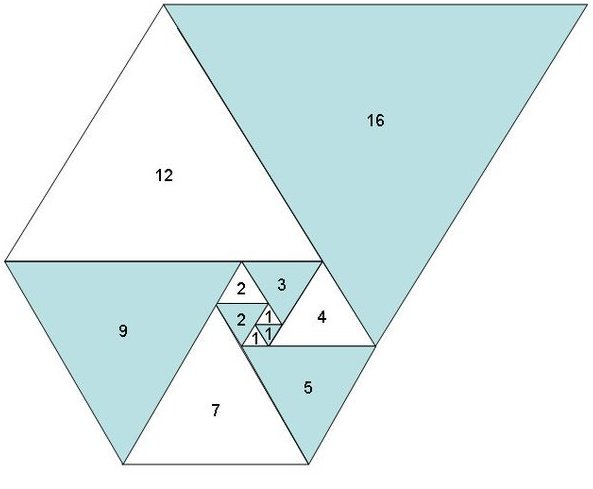

Uma forma era perceber que cada lado de um triângulo era igual ao lado do triângulo anterior e ao triângulo calculado quatro passos atrás. Por exemplo, 16 é 12+4, e 12 é 9+3.

Outra forma de detetar o padrão era perceber que dada a sequência `a,b,c` de lados, a próxima sequência era `b,c,a+b`. Ou seja, o lado do triângulo é a soma do penúltimo e do antepenúltimo. Esta segunda forma de criar a sequência facilita a base da recursão:

In [25]:
def seqPd1(n, a=1, b=1, c=1):
  if n == 0:
    return a
  return seqPd1(n-1, b, c, a+b)

seqPd1(123)

758216295635152

No entanto, se tentarmos calcular diretamente,

In [ ]:
def seqPd2(n):
  if n <= 2:
    return 1
  return seqPd2(n-3) + seqPd2(n-2)

temos o mesmo problema com a resolução direta do Fibonacci. Há um excesso de computação pelas repetições de cálculos, dando *Time Limit Excedeed*.

A seguinte solução explora ainda outro padrão (mais complicado), mas cuja solução direta funciona,

In [26]:
initial = [1, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12, 16, 21, 28, 37, 49, 65, 86, 114, 151, 200]
def seqPd3(n):
  if n > 20:
    return seqPd3(n-3) * 2 + seqPd3(n-7)
  return initial[n]

seqPd3(123)  

758216295635152

isto porque, pelo menos para valores não muito grandes, o subproblema `n-3` sobrepõe-se poucas vezes com o subproblema `n-7`, dado que o 3 e o 7 não partilham divisores (são primos entre si).

Mas o efeito das repetições está lá, só é menos intenso que no Fibonacci ou Tribonacci.

Podemos comparar o desempenho das duas soluções:

In [27]:
import time

def cronometro(f, *args):  # *args permite receber múltiplos parâmetros
  t0 = time.time()
  f(*args)
  t1 = time.time() - t0
  print("{0:0.3f} ms".format(1000*t1))  # tempo em milisegundos

cronometro(seqPd1, 123)
cronometro(seqPd3, 123)

0.108 ms
1614.043 ms


A segunda função foi 16000x mais lenta. 

Pode-se assim afirmar que foi sorte esta segunda solução não ter dado *Time Limit Excedeed* :-)